In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [180]:
data = pd.read_csv('AirQualityUCI1.csv')
data=data[~data['AH'].isin([-200])]
data.replace(-200.0,np.nan,inplace=True)
data = data.dropna(axis=0,how="all")
data = data.dropna(axis=1,how="all") #清理数据
data = data.dropna(thresh=int(data.shape[0] * .8), axis=1)

In [181]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [182]:
def fill(type):
    median = data[type].median()
    data[type].fillna(median, inplace =True)
para=['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)']
for type in para:
    fill(type)

In [183]:
X = data[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)']]
X.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


In [184]:
y1 = data[['T']]
y1.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


In [185]:
y2 = data[['RH']]
y2.head()

,RH
0,48.9
1,47.7
2,54.0
3,60.0
4,59.6


In [186]:
y3 = data[['AH']]
y3.head()

,AH
0,0.7578
1,0.7255
2,0.7502
3,0.7867
4,0.7888


In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X,y1,y2,y3,random_state=1)

In [188]:
print (X_train.shape)
print (y1_train.shape)
print (y2_train.shape)
print (y3_train.shape)
print (X_test.shape)
print (y1_test.shape)
print (y2_test.shape)
print (y3_test.shape)

(6743, 9)
(6743, 1)
(6743, 1)
(6743, 1)
(2248, 9)
(2248, 1)
(2248, 1)
(2248, 1)


In [189]:
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(X_train, y1_train)
linreg2 = LinearRegression()
linreg2.fit(X_train, y2_train)
linreg3 = LinearRegression()
linreg3.fit(X_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
print("T与各氧化物传感器的值的关系：")
print (linreg1.intercept_)
print (linreg1.coef_)
print("RH与各氧化物传感器的值的关系：")
print (linreg2.intercept_)
print (linreg2.coef_)
print("AH与各氧化物传感器的值的关系：")
print (linreg3.intercept_)
print (linreg3.coef_)

T与各氧化物传感器的值的关系：
[2.91510123]
[[-0.83428006 -0.01893312 -0.62482283  0.03113864 -0.0044106  -0.00654221
   0.02422125  0.02129385 -0.01194527]]
RH与各氧化物传感器的值的关系：
[88.27634887]
[[-0.34489633  0.03616921  0.76825531 -0.12810417  0.05776236 -0.01781811
  -0.16919169  0.021036    0.02368603]]
AH与各氧化物传感器的值的关系：
[1.76438387]
[[-5.04522299e-02 -5.03881907e-04  2.67731589e-03 -1.67112640e-03
   8.55265885e-04 -9.40434161e-04 -2.27888238e-03  1.62531210e-03
  -6.25214912e-05]]


In [191]:
y1_pred = linreg1.predict(X_test)
y2_pred = linreg2.predict(X_test)
y3_pred = linreg3.predict(X_test)
from sklearn import metrics
print("模型评价（均方差MSE和均方根差RMSE）：")
print("T")
print("MSE:",metrics.mean_squared_error(y1_test,y1_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("RH")
print("MSE:",metrics.mean_squared_error(y2_test,y2_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("AH")
print("MSE:",metrics.mean_squared_error(y3_test,y3_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

模型评价（均方差MSE和均方根差RMSE）：
T
MSE: 29.50897267900854
RMSE: 5.432216184855729
RH
MSE: 168.80049429446694
RMSE: 5.432216184855729
AH
MSE: 0.03788287892854487
RMSE: 5.432216184855729


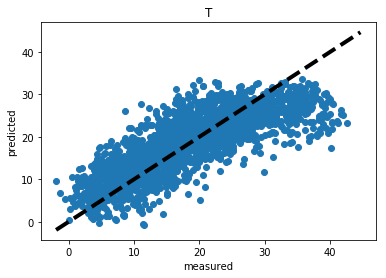

In [192]:
fig1, ax1 = plt.subplots()
ax1.set_title('T')
ax1.scatter(y1_test, y1_pred)
ax1.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax1.set_xlabel('measured')
ax1.set_ylabel('predicted')
plt.show()

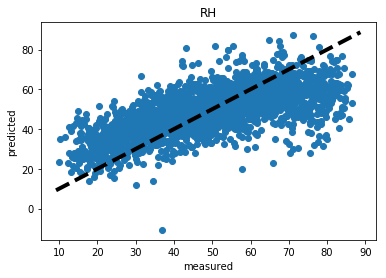

In [193]:
fig2, ax2 = plt.subplots()
ax2.set_title('RH')
ax2.scatter(y2_test, y2_pred)
ax2.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
ax2.set_xlabel('measured')
ax2.set_ylabel('predicted')
plt.show()

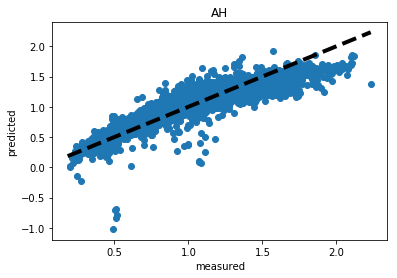

In [194]:
fig3, ax3 = plt.subplots()
ax3.set_title('AH')
ax3.scatter(y3_test, y3_pred)
ax3.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=4)
ax3.set_xlabel('measured')
ax3.set_ylabel('predicted')
plt.show()